# Prepare the model for HR dept to predict the attrition and give the insights and suggestions about the factors

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
os.getcwd()

'/Users/punchh_adityas/Desktop/python/9th_oct_22'

In [38]:
original_data= pd.read_csv("../datasets/HR_Employee_Attrition_Data1.csv")

In [39]:
df = original_data.copy()

In [40]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [42]:
# Observation
# 1) No missing value 
# 2) 24 are int and

In [43]:
pd.set_option('display.max_columns', 50)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [44]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [45]:
df.describe().T # Transpoe the matrixdf

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [46]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
df["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [11]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [51]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [35]:
# Emp count, over18n, StandardHours has only one value so we can drop this.

In [52]:
df.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

In [53]:
df.shape

(1470, 32)

In [54]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [56]:
df.drop(['EmployeeNumber'], axis=1, inplace=True)

In [57]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [59]:
df['Attrition'].value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

Text(0.5, 1.0, 'Percentage of No. of Attrition')

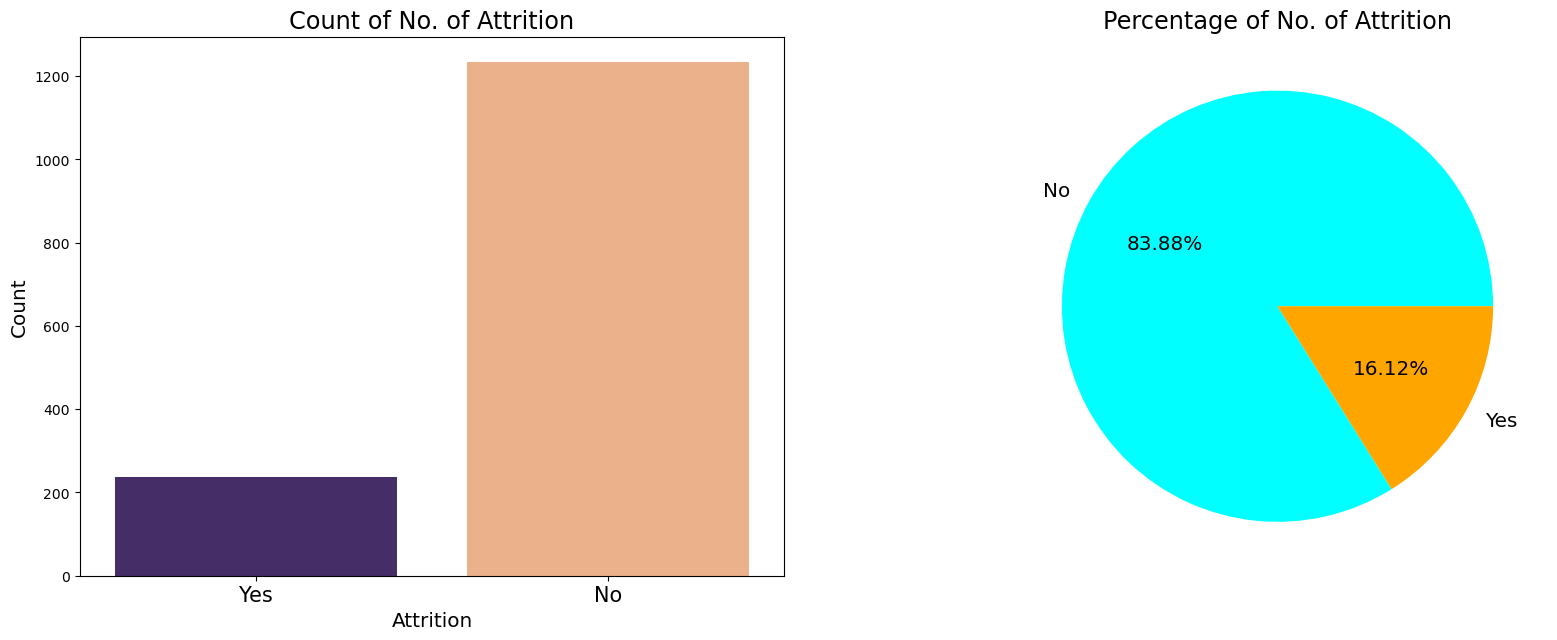

In [63]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Attrition'],palette=['#432371',"#FAAE7B"])
plt.title('Count of No. of Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=15)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts(),labels=df['Attrition'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'],textprops={'fontsize':'x-large'})
plt.title('Percentage of No. of Attrition',fontdict={'fontsize':'xx-large'})

In [64]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [67]:
df['Department'].value_counts(normalize=True)*100

Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64

Text(0.5, 1.0, 'Department Wise % of No Attrition')

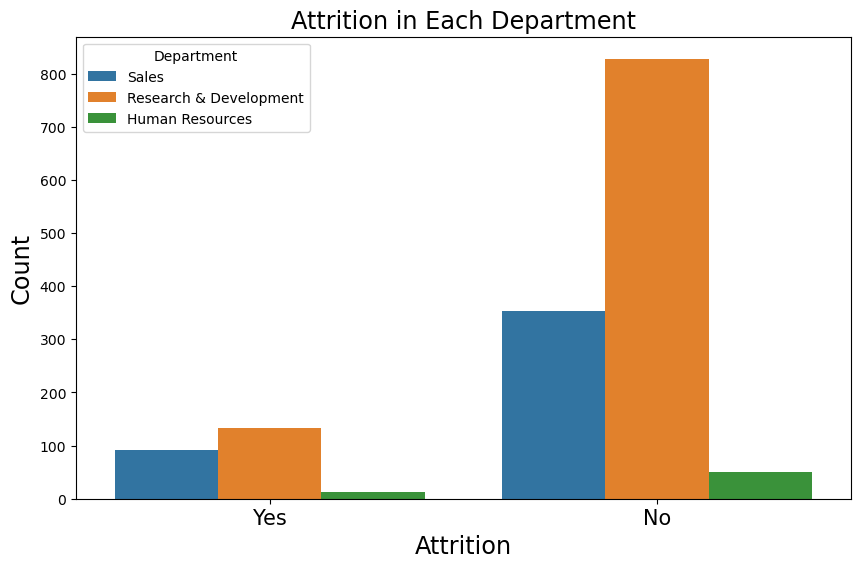

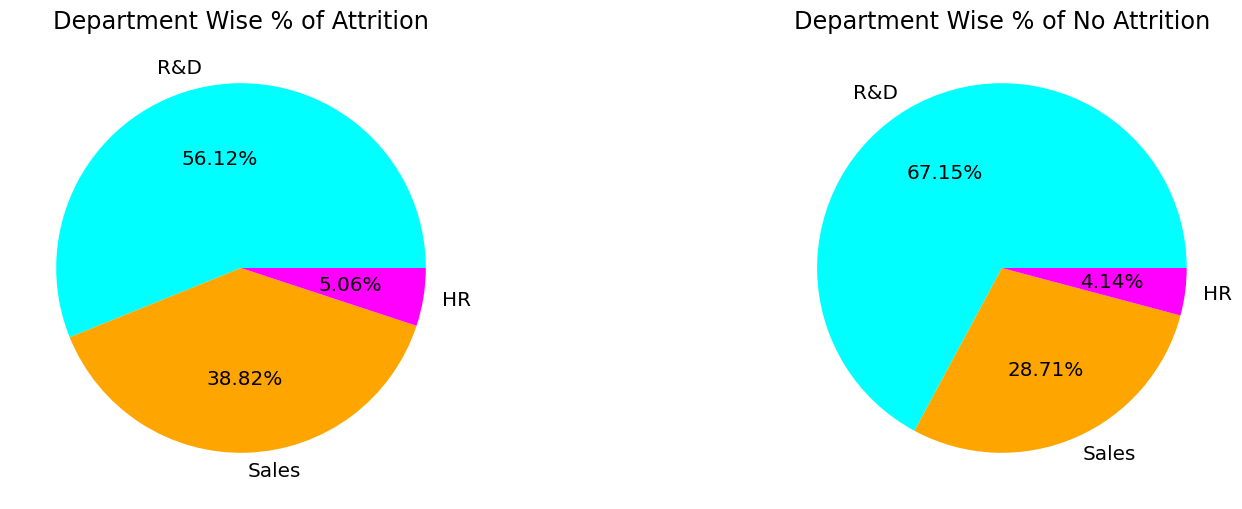

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition',hue='Department',data=df)
plt.title('Attrition in Each Department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=15)

plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Department Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Department Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

Text(0.5, 1.0, 'Travel Frequency Wise % of No Attrition')

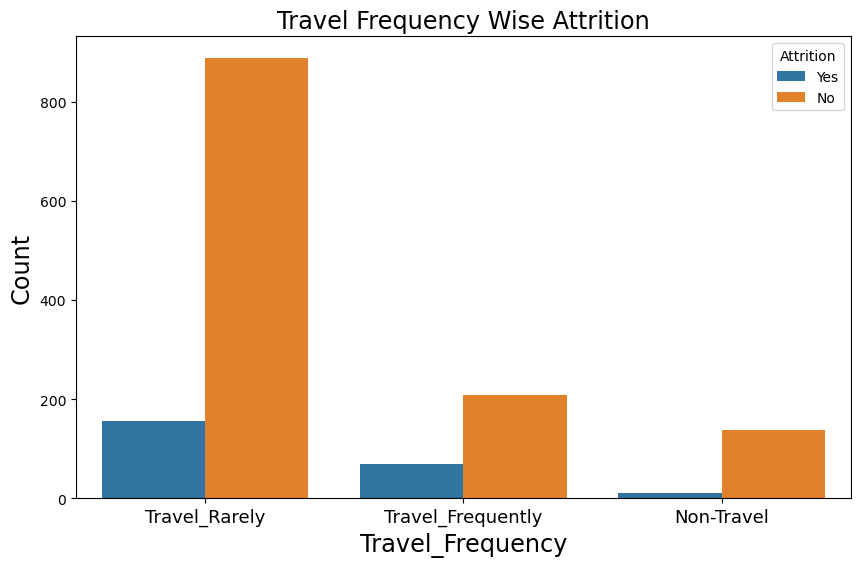

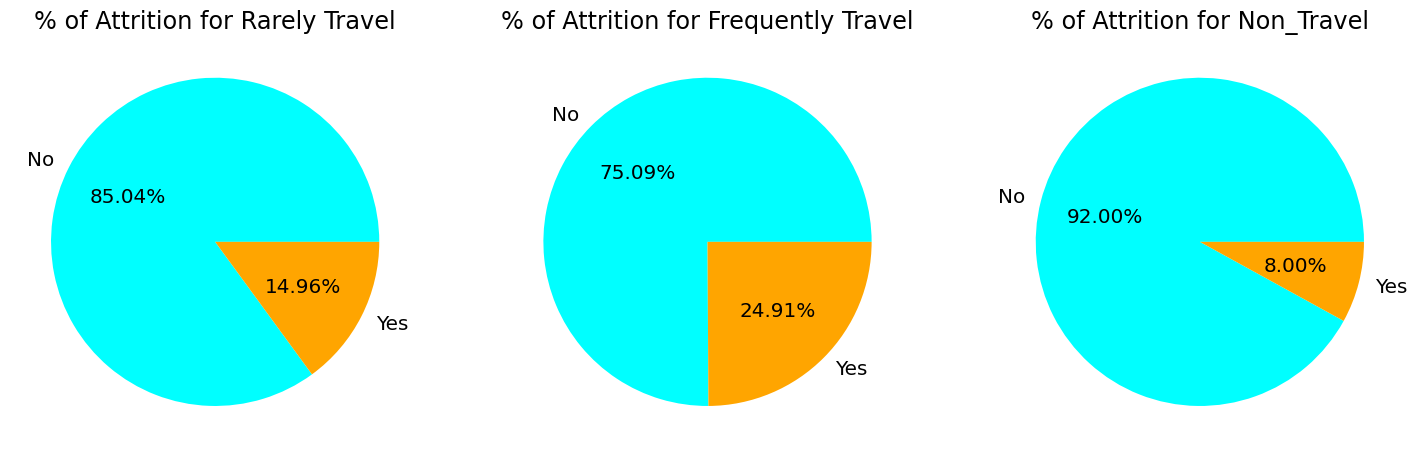

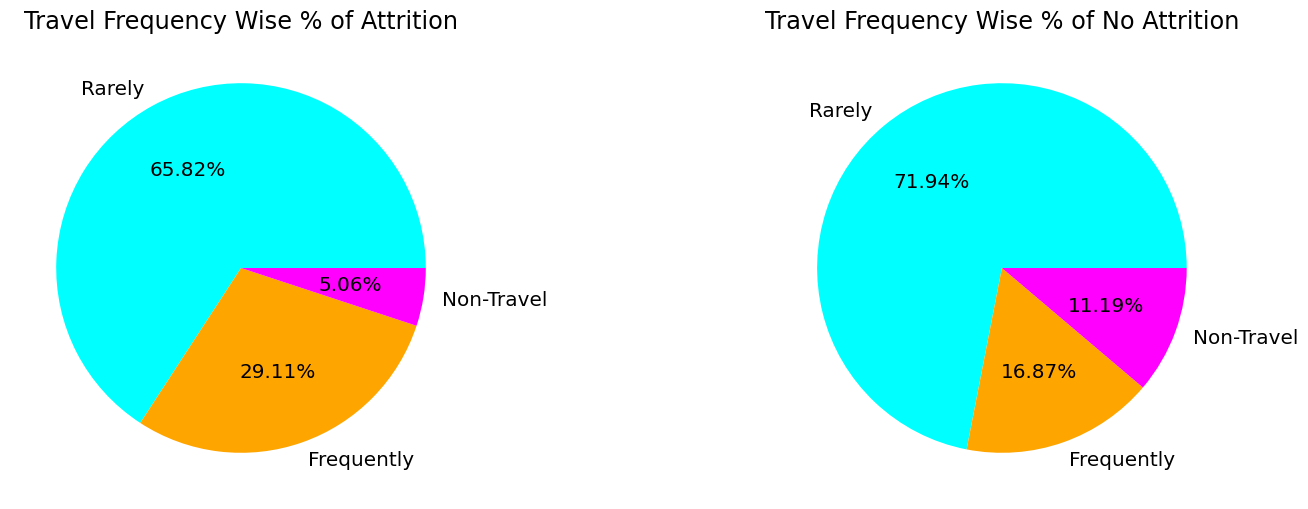

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
plt.title('Travel Frequency Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Travel_Frequency',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)


plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
Rarely_Travel=df[df['BusinessTravel']=='Travel_Rarely']
plt.pie(Rarely_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Rarely Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,2)
Frequently_Travel=df[df['BusinessTravel']=='Travel_Frequently']
plt.pie(Frequently_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Frequently Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,3)
Non_Travel=df[df['BusinessTravel']=='Non-Travel']
plt.pie(Non_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Non_Travel',fontdict={'fontsize':'xx-large'})


plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Travel Frequency Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Travel Frequency Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

In [74]:
# Observation : Travel frequency can be one of the parameter. Because if we see those employees who travel more frequently leave company more frequently. 
# Around 25% (24.91) employees leave company

Text(0.5, 1.0, 'Travel Frequency Wise % of No Attrition')

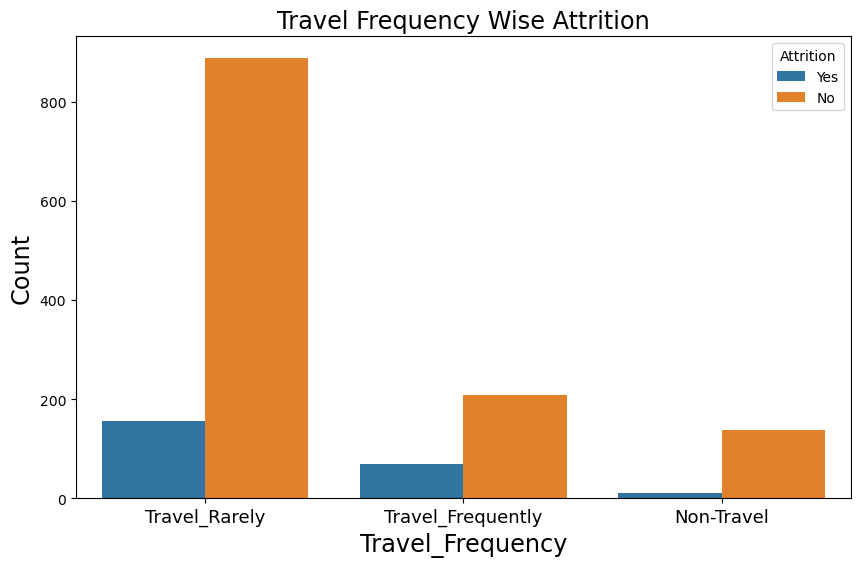

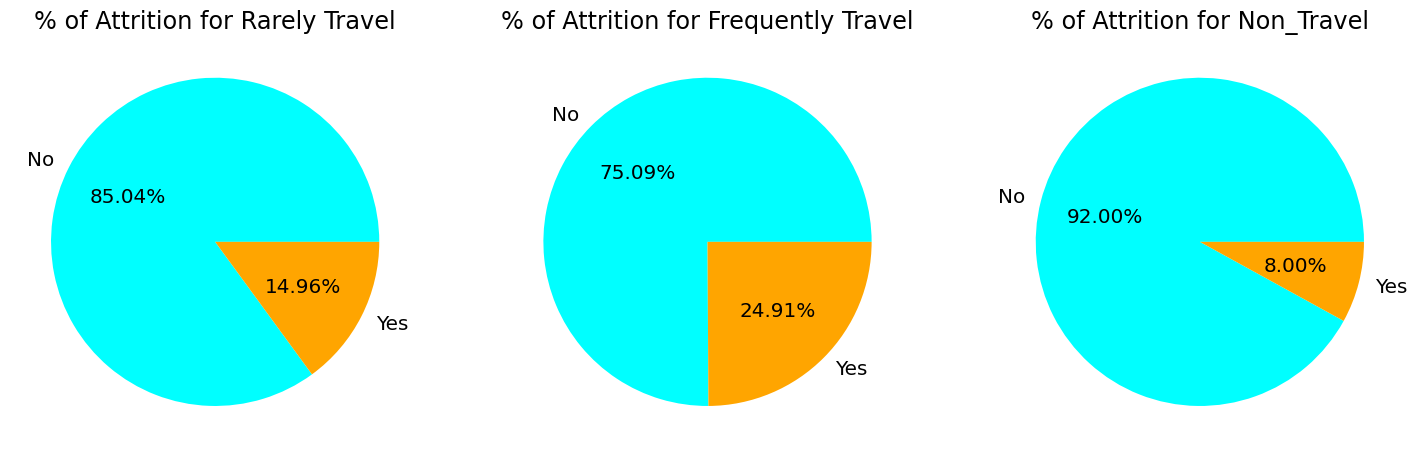

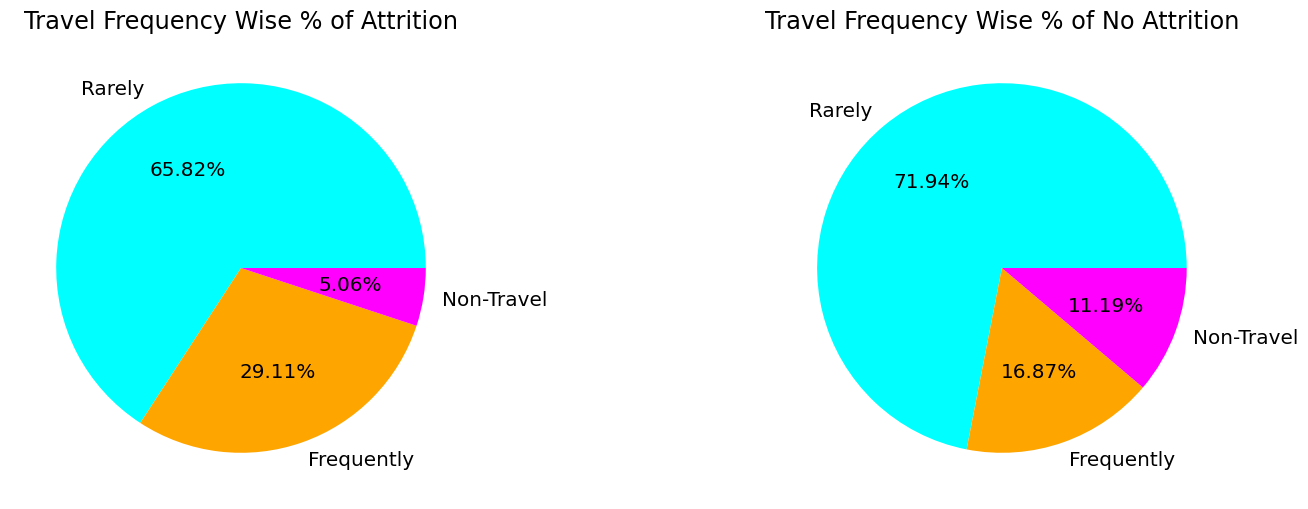

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
plt.title('Travel Frequency Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Travel_Frequency',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)


plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
Rarely_Travel=df[df['BusinessTravel']=='Travel_Rarely']
plt.pie(Rarely_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Rarely Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,2)
Frequently_Travel=df[df['BusinessTravel']=='Travel_Frequently']
plt.pie(Frequently_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Frequently Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,3)
Non_Travel=df[df['BusinessTravel']=='Non-Travel']
plt.pie(Non_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Non_Travel',fontdict={'fontsize':'xx-large'})


plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Travel Frequency Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Travel Frequency Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

Text(0, 0.5, 'Count')

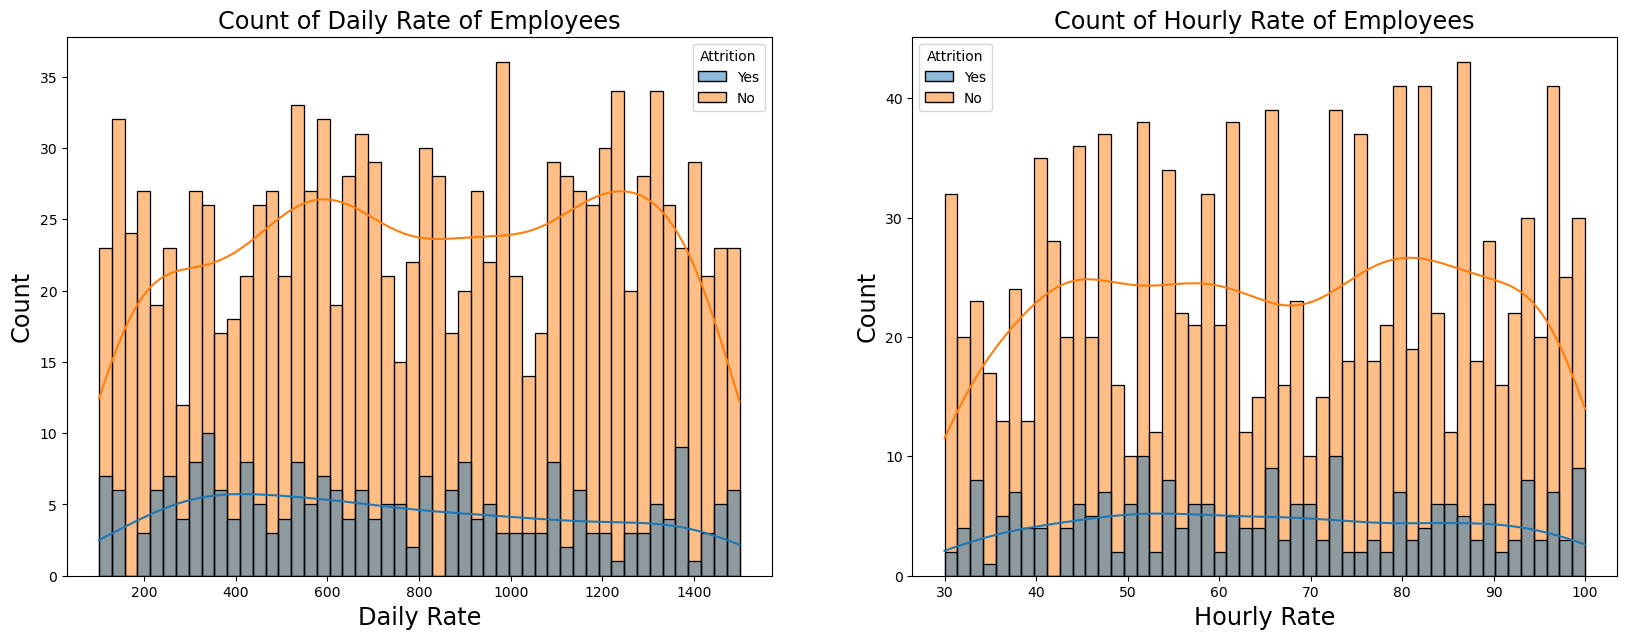

In [80]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(x='DailyRate',kde=True,bins=50,hue='Attrition',data=df)
plt.title('Count of Daily Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Daily Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.histplot(x='HourlyRate',kde=True,bins=50,hue='Attrition',data=df)
plt.title('Count of Hourly Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Hourly Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})



In [81]:
# Observation: From the above graph we can see that there is no impact of DailyRate or Hourly Rate on employee attrition rate.

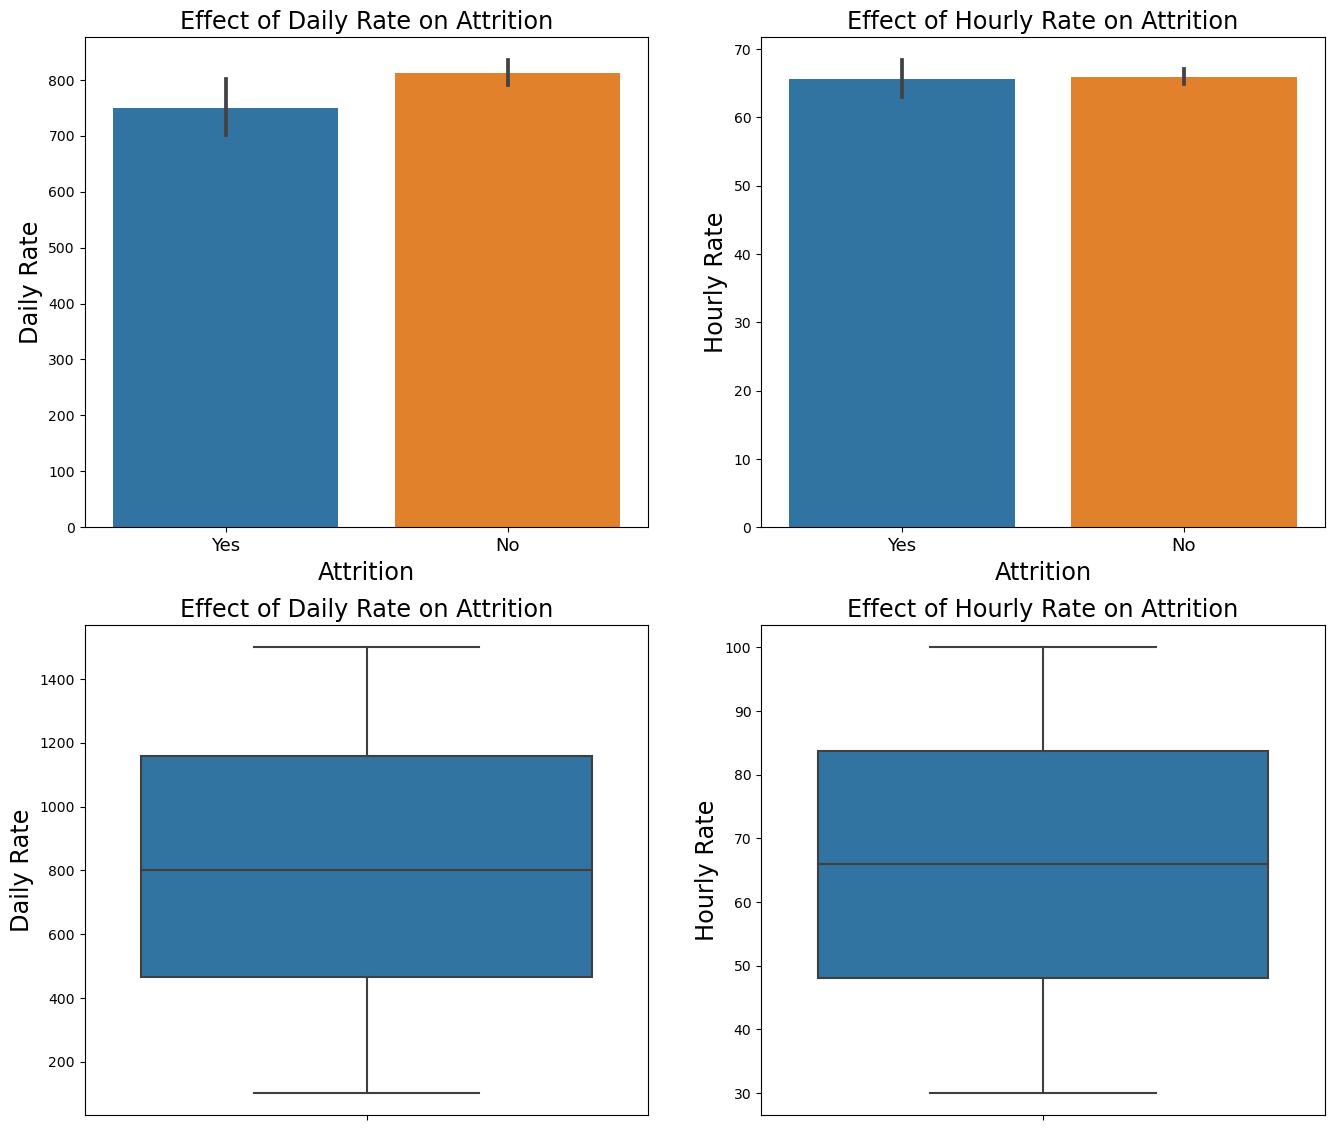

In [82]:
plt.subplots(2,2,figsize=(16,14))

plt.subplot(2,2,1)
sns.barplot(x='Attrition',y='DailyRate',data=df)
plt.title('Effect of Daily Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Daily Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,2)
sns.barplot(x='Attrition',y='HourlyRate',data=df)
plt.title('Effect of Hourly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Hourly Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,3)
sns.boxplot(y='DailyRate',data=df)
plt.title('Effect of Daily Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Daily Rate',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.boxplot(y='HourlyRate',data=df)
plt.title('Effect of Hourly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Hourly Rate',fontdict={'fontsize':'xx-large'})

plt.show()

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

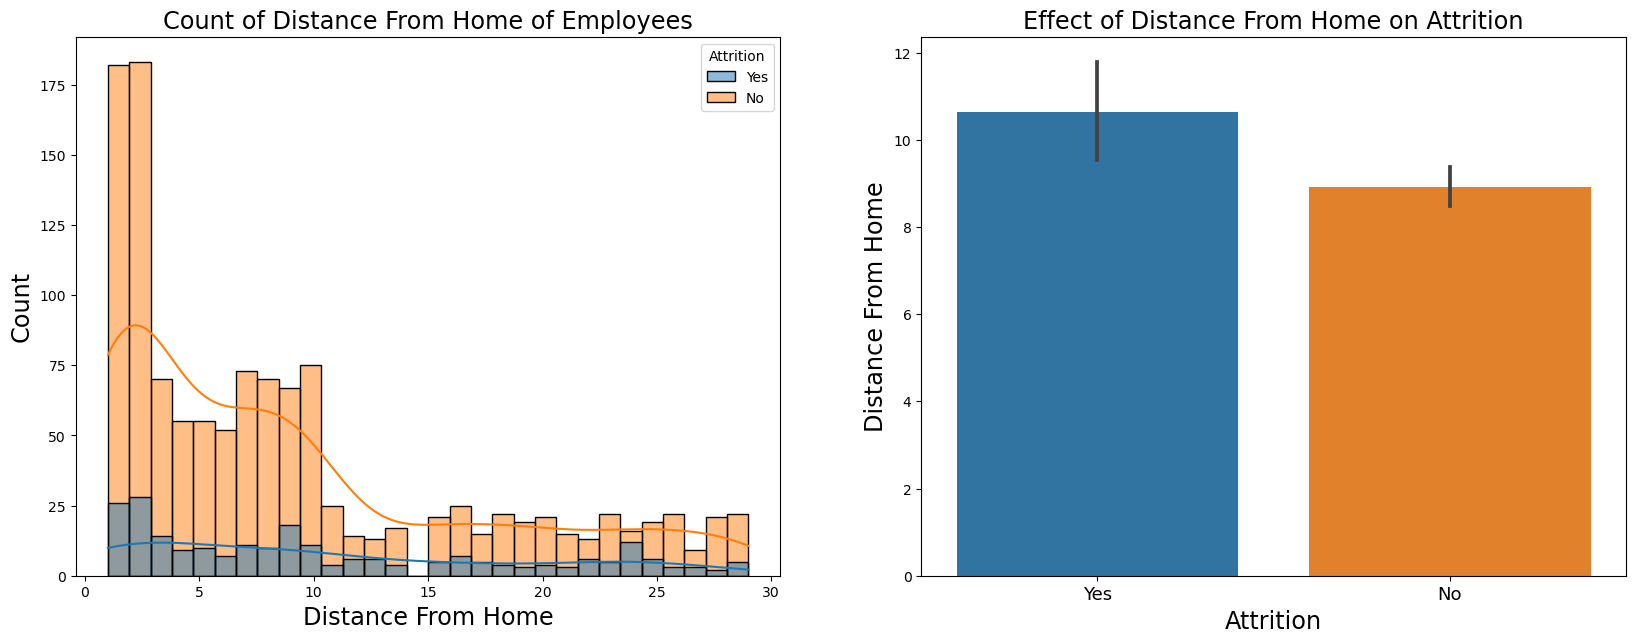

In [28]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(x='DistanceFromHome',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Count of Distance From Home of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Distance From Home',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.barplot(x='Attrition',y='DistanceFromHome',data=df)
plt.title('Effect of Distance From Home on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Distance From Home',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

Text(0.5, 1.0, 'Educational Field Wise % of No Attrition')

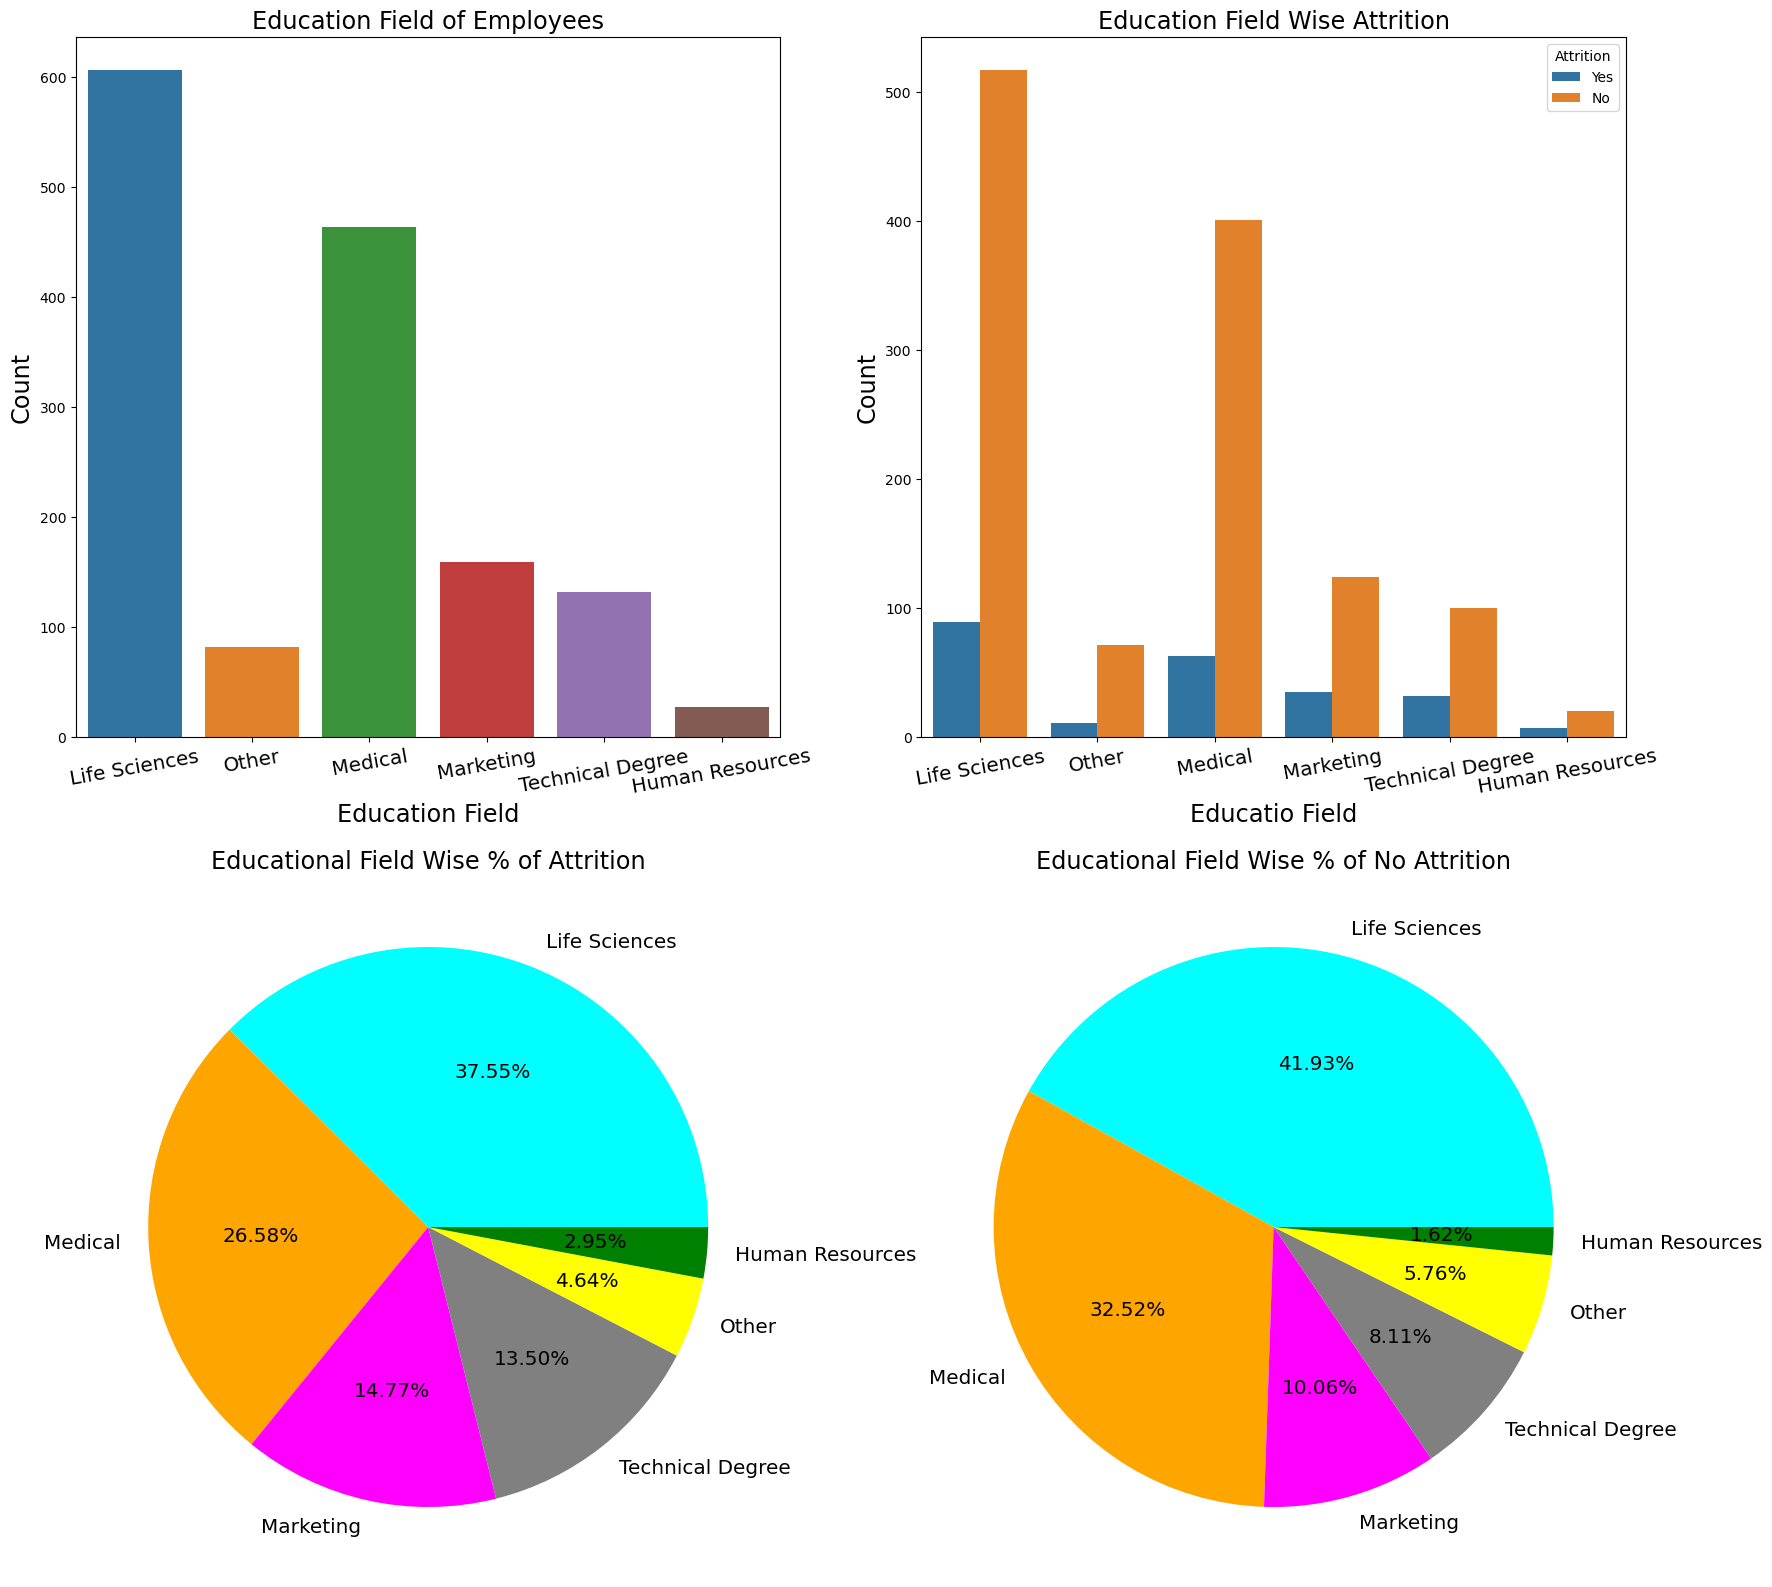

In [29]:
plt.subplots(2,2,figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(x='EducationField',data=df)
plt.title('Education Field of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Education Field',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=10,fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='EducationField',data=df,hue='Attrition')
plt.title('Education Field Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Educatio Field',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=10,fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['EducationField'].value_counts(),labels=Attrition_yes['EducationField'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow','green'])
plt.title('Educational Field Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['EducationField'].value_counts(),labels=Attrition_no['EducationField'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow','green'])
plt.title('Educational Field Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

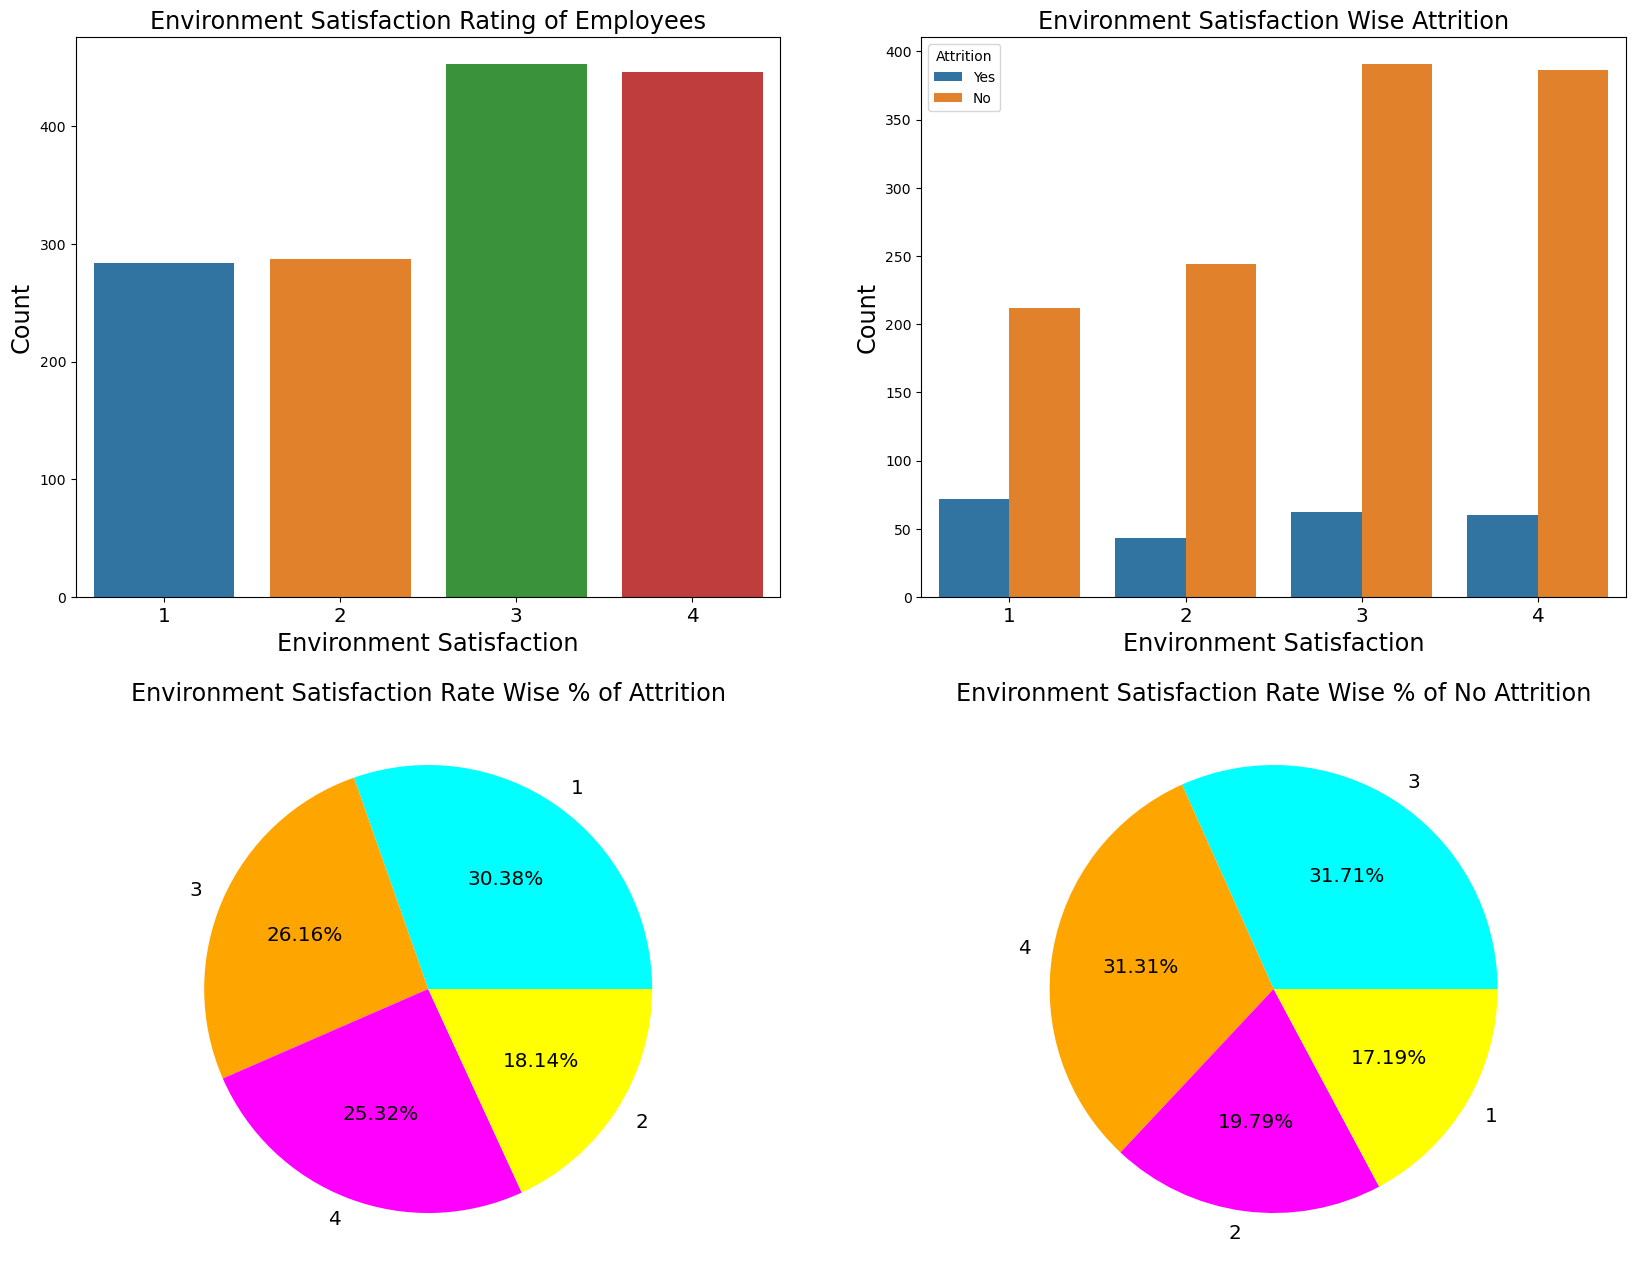

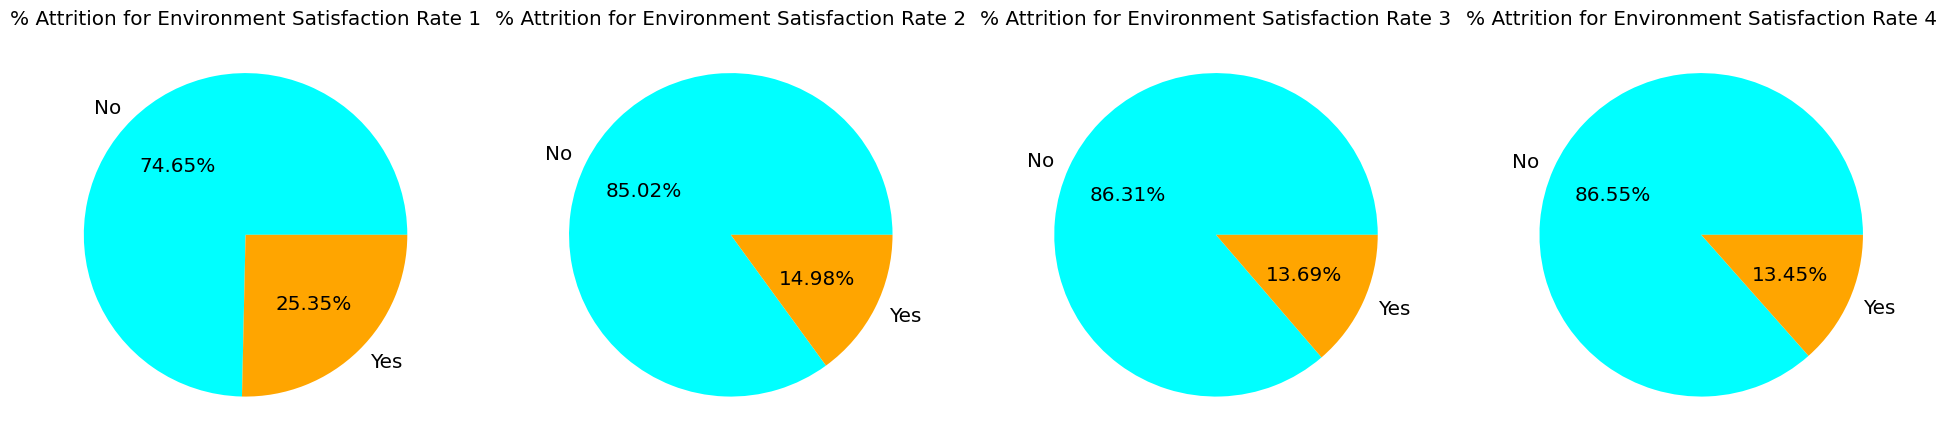

In [30]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
sns.countplot(x='EnvironmentSatisfaction',data=df)
plt.title('Environment Satisfaction Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Environment Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='EnvironmentSatisfaction',data=df,hue='Attrition')
plt.title('Environment Satisfaction Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Environment Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['EnvironmentSatisfaction'].value_counts(),labels=Attrition_yes['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Environment Satisfaction Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['EnvironmentSatisfaction'].value_counts(),labels=Attrition_no['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Environment Satisfaction Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['EnvironmentSatisfaction']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['EnvironmentSatisfaction']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['EnvironmentSatisfaction']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['EnvironmentSatisfaction']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 4',fontdict={'fontsize':'x-large'})

plt.show()